now loss =  0.12886260648579728  accuracy =  0.712
now loss =  0.06031633372035146  accuracy =  0.847
now loss =  0.10629382698575837  accuracy =  0.878
now loss =  0.08430613862860076  accuracy =  0.89
now loss =  0.0747825576313905  accuracy =  0.901
now loss =  0.08606192454751599  accuracy =  0.909
now loss =  0.041836646560445  accuracy =  0.916
now loss =  0.036313546046065355  accuracy =  0.919
now loss =  0.07381943314387472  accuracy =  0.922
now loss =  0.03867871317131168  accuracy =  0.93


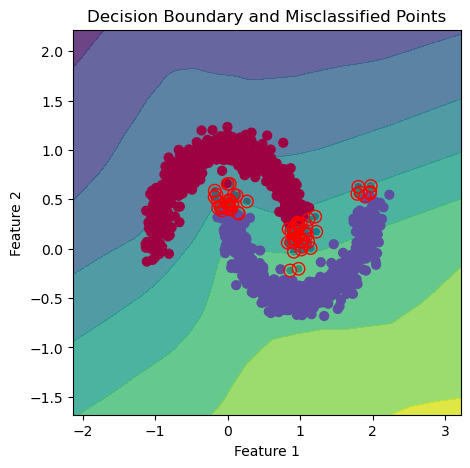

In [1]:
import numpy as np

from layers import Affine, Relu
from model import Model
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=1000, noise=0.1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

nn = Model(layers=[Affine(100), Relu(), Affine(100), Relu(), Affine(1)])

targets = np.reshape(y, (y.shape[0], 1))
nn.fit(X, targets, n_epochs=10)


# Create a mesh grid for plotting decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Predict on the original data
y_pred = nn.predict(X)
# Threshold predictions to get binary labels
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

# Find misclassified points
misclassified = y_pred_labels != y

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
# Plot correctly classified points
plt.scatter(X[~misclassified, 0], X[~misclassified, 1], c=y[~misclassified], s=40, cmap=plt.cm.Spectral)
# Highlight misclassified points
plt.scatter(X[misclassified, 0], X[misclassified, 1], facecolors='none', edgecolors='r', s=80, marker='o')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Misclassified Points')
plt.show()
